# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Faisal Rabbani Sitompul]
- **Email:** [faisalrabbanisitompul@gmail.com]
- **ID Dicoding:** [owlninj4]

## Menentukan Pertanyaan Bisnis

- What are the key factors influencing the number of bike rentals (casual, registered, and total)?
- What are the patterns of bike usage based on seasons, time of the day (hour), and working or holiday conditions?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

#### Membaca data hour.csv

In [2]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Membaca data day.cvs

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Assesing data hour.csv

In [4]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Assesing data day.csv

In [7]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pengguna terdaftar (registered) secara konsisten lebih banyak daripada pengguna kasual di kedua dataset.
- Variabel seperti suhu, kelembapan, dan kecepatan angin berpotensi memengaruhi pola penggunaan sepeda.
- Penggunaan harian lebih fluktuatif

### Cleaning Data

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Kolom dteday bertipe object meskipun menyimpan data tanggal. Idealnya, kolom ini seharusnya dikonversi menjadi tipe datetime.
- Mengahpus kolom 'instant', Kolom ini tampaknya adalah indeks unik untuk setiap baris, yang redundan karena DataFrame sudah memiliki indeks bawaan. 

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['instant'], inplace=True)

Cek kembali "dteday"

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


## Exploratory Data Analysis (EDA)

### Distribusi Variabel Target (cnt)

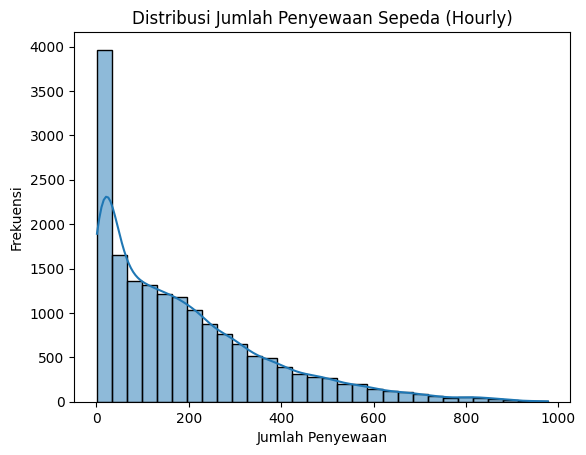

In [15]:
sns.histplot(hour_df['cnt'], kde=True, bins=30)
plt.title('Distribusi Jumlah Penyewaan Sepeda (Hourly)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

Termasuk kedalam Right-skewed distribution

In [16]:
hour_df['cnt'].describe(include="all")

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

**Insight:**
- Termasuk kedalam Right-skewed distribution

### Analisis Tren Waktu

**Tren Harian atau Bulanan**

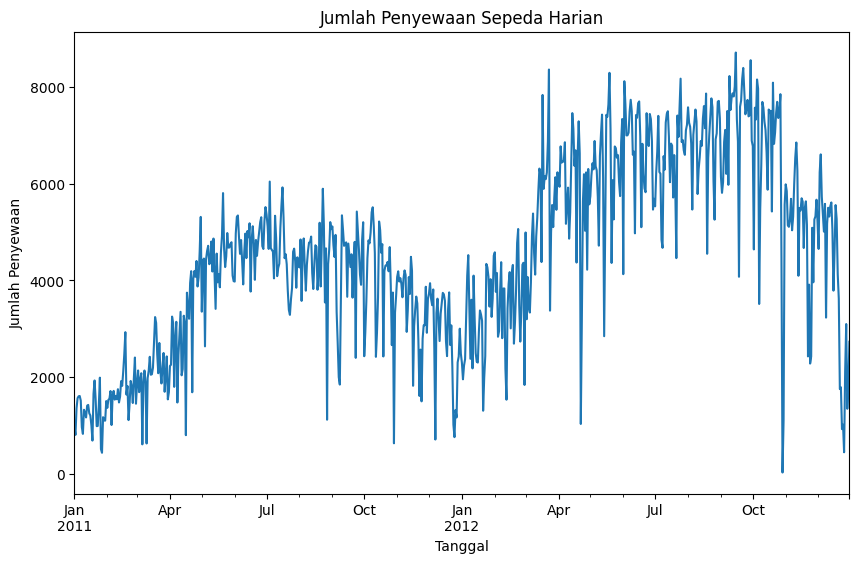

In [17]:
hour_df.groupby('dteday')['cnt'].sum().plot(kind='line', figsize=(10, 6))
plt.title('Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Tren Berdasarkan Waktu dalam Sehari**

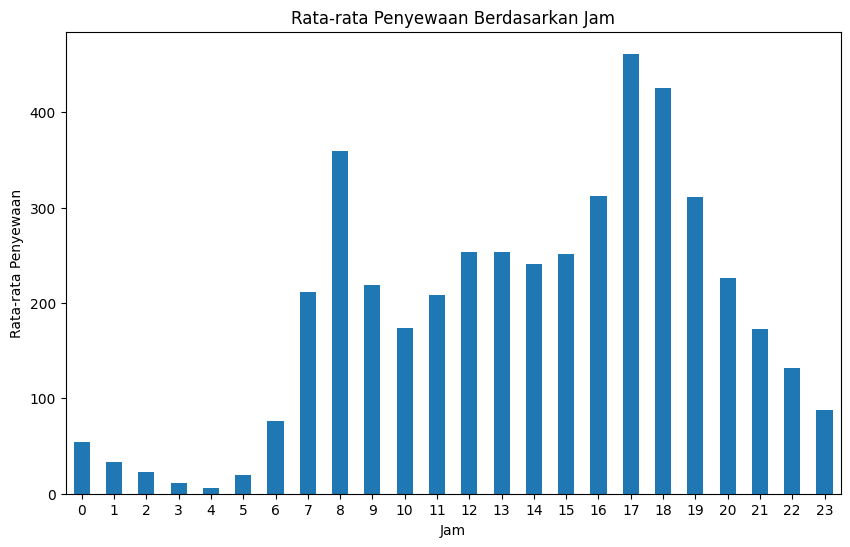

In [18]:
hour_df.groupby('hr')['cnt'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Penyewaan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Penyewaan paling banyak dilakukan sete;ah tahun 2012 lebih tepatnya pada bulan April-Oktober
- Penyewaan sepeda paling sering dilakukan pada sore sempai malam hari

### Analisis Berdasarkan Kategori

**Musim** = Jumlah penyewaan berbeda berdasarkan musim (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).

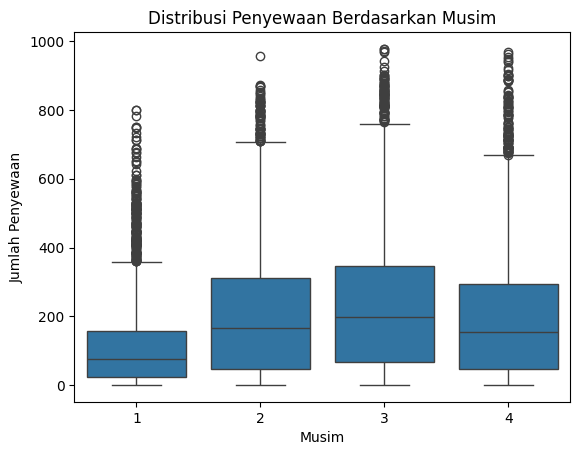

In [19]:
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Distribusi Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Hari Kerja vs Libur** = Perbandingan jumlah penyewaan di hari kerja (workingday = 1) dan hari libur (workingday = 0).

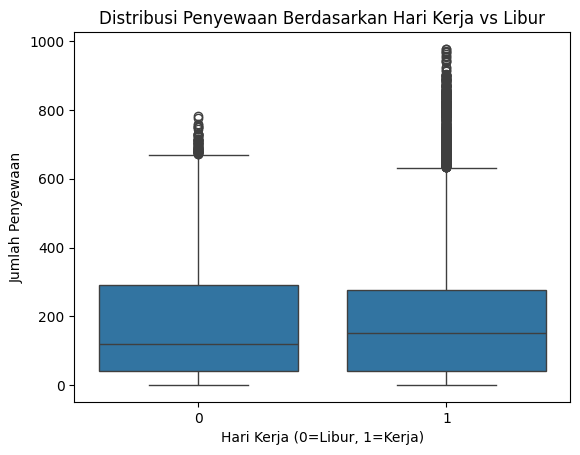

In [20]:
sns.boxplot(x='workingday', y='cnt', data=hour_df)
plt.title('Distribusi Penyewaan Berdasarkan Hari Kerja vs Libur')
plt.xlabel('Hari Kerja (0=Libur, 1=Kerja)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Kombinasi Analisis Waktu dan Kategori

Pengaruh Waktu dan Kategori (Misal Musim) = Melihat tren jumlah penyewaan berdasarkan musim dan jam tertentu.

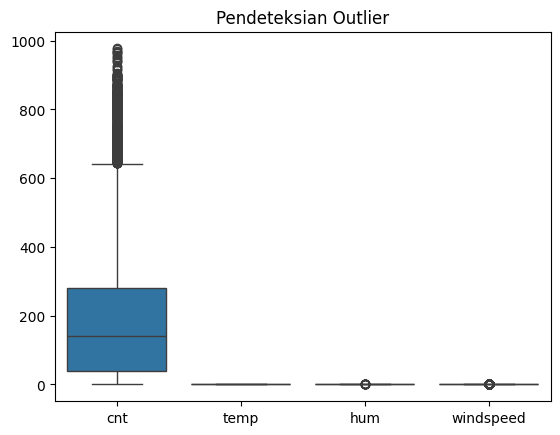

In [21]:
sns.boxplot(data=hour_df[['cnt', 'temp', 'hum', 'windspeed']])
plt.title('Pendeteksian Outlier')
plt.show()

**Insight:**
- Jumlah Penyewaan tetap tinggi pada sore sampai malam hari di berbagai musim

### Analisis Korelasi

**Korelasi Antar Variabel Numerik** = Hubungan antara variabel seperti temp, hum, windspeed, dan cnt.

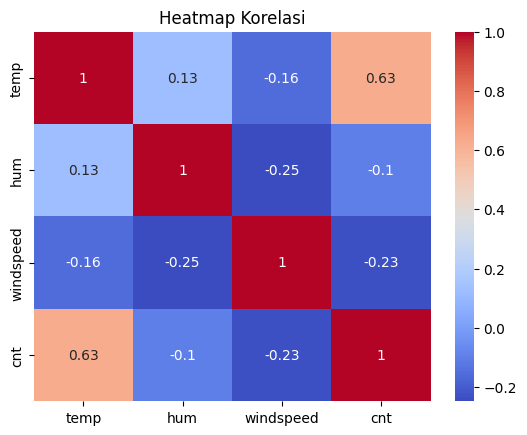

In [22]:
corr_matrix = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

### Rata-rata Penyewaan Berdasarkan Hari dan Jam

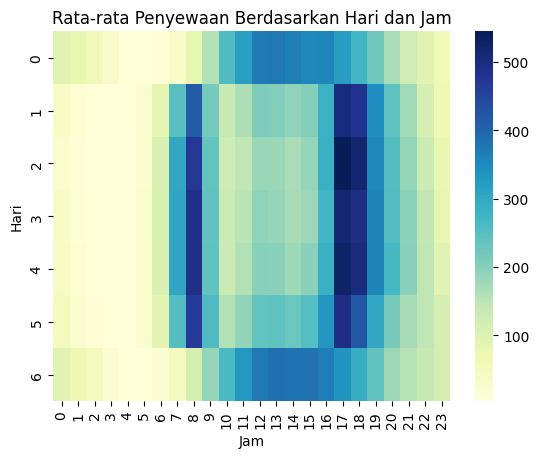

In [23]:
pivot_table = hour_df.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Rata-rata Penyewaan Berdasarkan Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Key Factors Influencing Bike Rentals

Melihat hubungan antara cnt (jumlah total penyewaan), casual (penyewaan informal), dan registered (penyewaan terdaftar). Fokusnya pada fitur Cuaca (weathersit), Suhu (temp), Kelembapan (hum), dan Kecepatan Angin (windspeed).

1. Hubungan antara temp dan cnt:

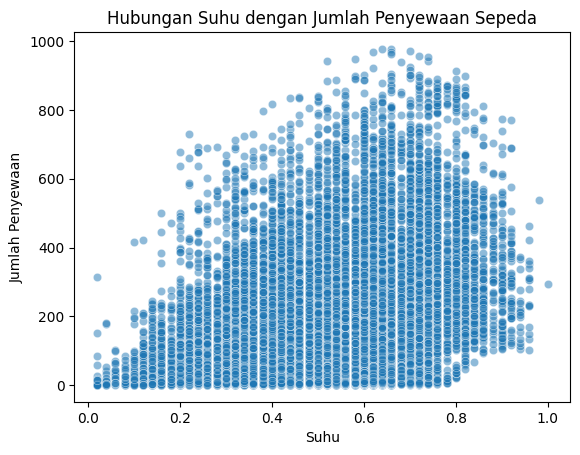

In [24]:
sns.scatterplot(x='temp', y='cnt', data=hour_df, alpha=0.5)
plt.title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight**
- Semakin rendah suhunya, orang yang menyewa sepeda semakin sedikit
- Orang lebih banyak beraktifitas pada suhu normal dari pada suhu rendah

2. Pengaruh weathersit terhadap Penyewaan:

C:\Users\Owlninj4\AppData\Local\Temp\ipykernel_23308\3698529238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')


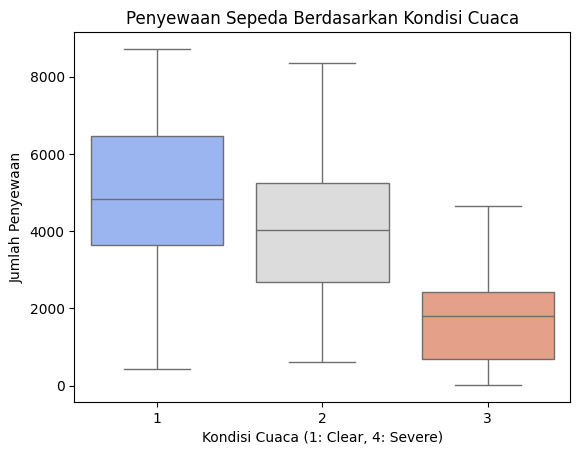

In [25]:
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Clear, 4: Severe)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight**

Cuaca buruk memengaruhi jumlah penyewaan secara signifikan.

3. Korelasi antara Variabel Numerik dan cnt:

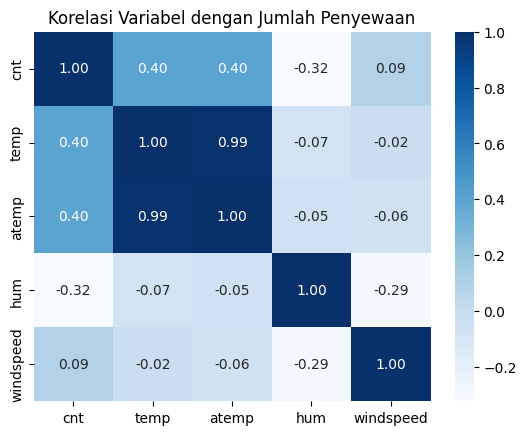

In [26]:
corr_matrix = hour_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Korelasi Variabel dengan Jumlah Penyewaan')
plt.show()

**Insight**

Variabel temp memiliki korelasi tertinggi dengan jumlah penyewaan

4. Faktor (Suhu & Musim) terhadap Penggguna yang terdaftar dan tidak

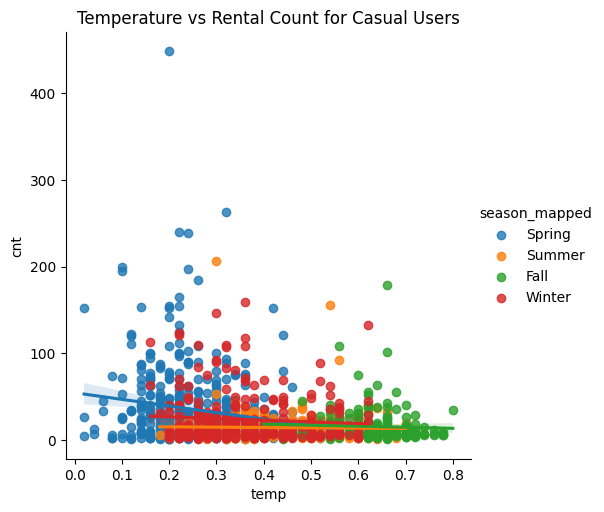

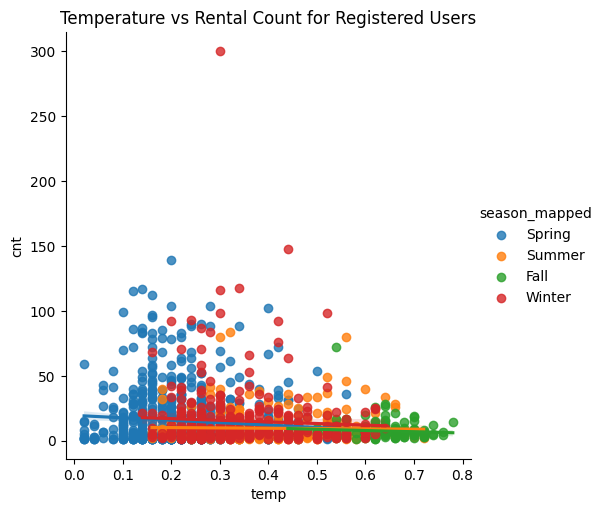

In [28]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_mapped'] = hour_df['season'].map(season_mapping)
sns.lmplot(x='temp', y='cnt', data=hour_df[hour_df['casual'] == 1], hue='season_mapped', logistic=False)
plt.title('Temperature vs Rental Count for Casual Users')
plt.show()

sns.lmplot(x='temp', y='cnt', data=hour_df[hour_df['casual'] == 0], hue='season_mapped', logistic=False)
plt.title('Temperature vs Rental Count for Registered Users')
plt.show()

**Insight**

Pengguna biasa (Tidak terdaftar) menyewa lebih banyak daripada pengguna yang terdaftar.

### Pertanyaan 2:

#### Patterns of Bike Usage

Memeriksa pola berdasarkan musim (season), waktu dalam sehari (hr), dan apakah hari itu hari kerja atau libur (workingday, holiday).

1. Pola Penyewaan Berdasarkan Jam dan Kategori Hari (Kerja/Libur):

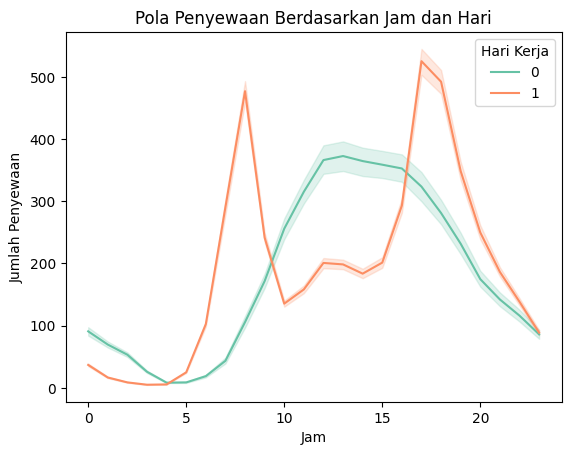

In [29]:
sns.lineplot(x='hr', y='cnt', hue='workingday', data=hour_df, palette='Set2')
plt.title('Pola Penyewaan Berdasarkan Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Hari Kerja')
plt.show()

**Insight:**
- Puncak penyewaan sepeda terjadi pada pagi dan sore hari
- Pada hari libur, puncak penyewaan sepeda hanya terjadi mulai pukul 10 pagi sampai sore hari

2. Pola Penyewaan Berdasarkan Musim

C:\Users\Owlninj4\AppData\Local\Temp\ipykernel_23308\2679150738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_mapped', y='cnt', data=hour_df, palette='muted')


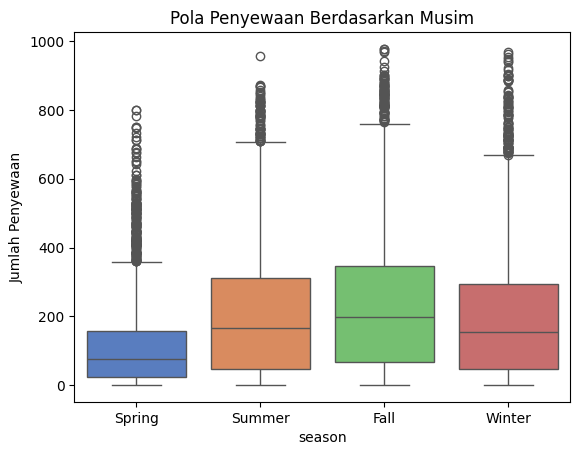

In [30]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_mapped'] = hour_df['season'].map(season_mapping)

sns.boxplot(x='season_mapped', y='cnt', data=hour_df, palette='muted')
plt.title('Pola Penyewaan Berdasarkan Musim')
plt.xlabel('season')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Penyewaan Sepeda Lebih besar pada Musim Gugur

3. Pola Penyewaaan Berdasarkan Hari dalam Seminggu

C:\Users\Owlninj4\AppData\Local\Temp\ipykernel_23308\1198416101.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=hour_df, ci=None, palette='viridis')
C:\Users\Owlninj4\AppData\Local\Temp\ipykernel_23308\1198416101.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=hour_df, ci=None, palette='viridis')


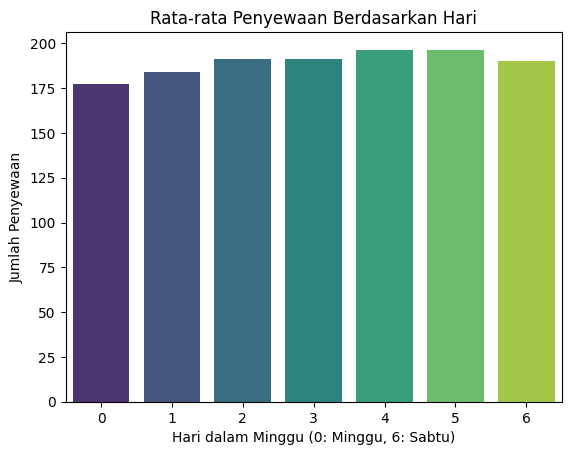

In [31]:
sns.barplot(x='weekday', y='cnt', data=hour_df, ci=None, palette='viridis')
plt.title('Rata-rata Penyewaan Berdasarkan Hari')
plt.xlabel('Hari dalam Minggu (0: Minggu, 6: Sabtu)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Hari Weekday (Senin -Sabtu) Merupakan hari tertinggi penyewaan sepeda

## Conclusion

- Conclution pertanyaan 1

   The analysis of bike rentals reveals that several key factors significantly influence the number of rentals, including weather conditions, temperature, humidity, and windspeed. First, it is evident that lower temperatures result in fewer bike rentals, as people tend to be less active in colder weather. The data also shows that bike rentals are highly sensitive to weather conditions; poor weather significantly reduces the number of rentals, likely due to discomfort or safety concerns. Temperature emerges as the variable with the highest correlation to the number of rentals, indicating that warmer temperatures encourage more people to rent bikes. Additionally, casual (informal) users rent bikes more frequently than registered users, which suggests that spontaneous, non-committed use is more common, particularly when conditions are favorable.
- Conclution pertanyaan 2

   The analysis of bike usage patterns highlights some clear trends based on the season, time of day, and whether it is a working day or holiday. Peak bike rentals occur in the morning and late afternoon, with a notable increase during these times for regular working days. On holidays, bike rentals peak later in the day, starting from around 10 AM and continuing into the afternoon. The fall season stands out as the period with the highest bike rentals, likely due to favorable weather conditions that encourage outdoor activities. Finally, weekdays (Monday through Saturday) experience the highest number of bike rentals, with rental activity significantly dropping on Sundays, which may be attributed to fewer people commuting or using bikes for leisure on weekends.


In [32]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
